<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0519/0519_01_5_%E1%84%86%E1%85%A5%E1%84%89%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC_DecisionTree(%EC%88%98%EC%97%85%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # matplotlib과 관련된 모듈을 미리 선언
# %matplotlib inline
import matplotlib.pyplot as plt
# from matplotlib import rc
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

import numpy as np

## Decision Tree (의사결정 나무)

- 복잡하고 이해하기 어려운 모델 원리들

- 시각적으로 쉽게 이해할 수 있는 모델은 없을까?
    - 정답은 의사결정 나무(Decision Tree) 모델!
    - 단, 사람이 규제하지 않으면 100% 과적합 일어난다

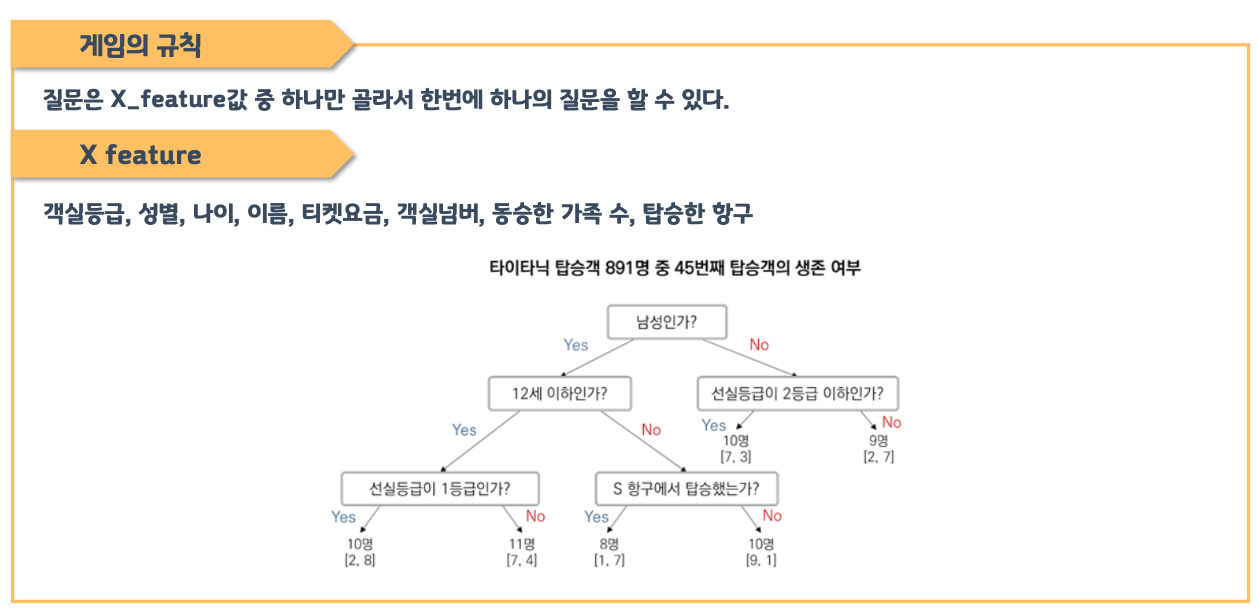

### 의사 결정 나무의 핵심? 좋은 질문! 

- 좋은 질문이란? 
    - 전체 데이터 셋을 카테고리를 기준으로 명확하게 잘 구분해주는 질문! 

- 좋은 질문을 측정하는 방법
    - 데이터의 불순도(Impurity)를 최소화하는 구역으로 나누자!
    - 불순도 : 다른 데이터가 섞여 있는 정도

- 불순도를 측정하는 방법
    -  Information Gain(정보획득)을 측정하는 방법
    - 정보획득을 계산하는 많은 방법들 중, Entropy와 Gini계수가 대표적
    - 그 중 우선, Entropy만 알아도 충분하다.

    - m개의 레코드가 속하는 A영역에 대한 엔트로피 식

$$ Entropy(A) = -\sum_{k=1}^{m}p_klog_{2}(p_k)$$

분할 전 엔트로피 계산 
- 전체 공 : 20개 
- 파란 공 : 10개
- 하얀 공 : 10개 

$$ Entropy(A) = -\frac{10}{20}log_{2}{\frac{10}{20}}-\frac{10}{20}log_{2}{\frac{10}{20}}$$

In [2]:
# 위의 식을 계산해보세요
-0.5 * np.log2(0.5) - 0.5 * np.log2(0.5)

1.0

A 영역에 빨간색 점선을 그어 두 개 부분집합(R1, R2)으로 분할한다고 가정해 봅시다.    
두 개 이상 영역에 대한 엔트로피 공식은 아래 식과 같습니다. 

    
이 공식에 의해 분할 수 A 영역의 엔트로피를 아래와 같이 각각 구할 수 있습니다.     
(Ri=분할 전 레코드 가운데 분할 후 i 영역에 속하는 레코드의 비율)   

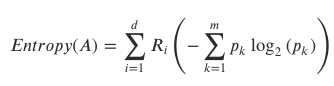

왼쪽 엔트로피

- Ri = 10 / 20 = 0.5 
- 파 : 흰 = 6 : 4 | 4 : 6

$$ Entropy(A) = 0.5\times(-\frac{6}{10}log_{2}{\frac{6}{10}}-\frac{4}{10}log_{2}{\frac{4}{10}})+0.5\times(-\frac{4}{10}log_{2}{\frac{4}{10}}-\frac{6}{10}log_{2}{\frac{6}{10}})$$

In [18]:
# 위의 식을 계산해보세요 
0.5*((-0.6 * np.log2(0.6))-(0.4* np.log2(0.4))) + 0.5 *((-0.4* np.log2(0.4))-(0.6 * np.log2(0.6)))

0.4854752972273343

오른쪽 엔트로피

- Ri = 10 / 20 = 0.5 
- 파 : 흰 = 9:1 | 1:9

$$ Entropy(A) = 0.5\times(-\frac{9}{10}log_{2}{\frac{9}{10}}-\frac{1}{10}log_{2}{\frac{1}{10}})+0.5\times(-\frac{1}{10}log_{2}{\frac{1}{10}}-\frac{9}{10}log_{2}{\frac{9}{10}})$$

In [17]:
# 위의 식을 계산해보세요
0.5*((-0.9 * np.log2(0.9))-(0.1* np.log2(0.1))) + 0.5 *((-0.1* np.log2(0.1))-(0.9 * np.log2(0.9)))

0.2344977967946406

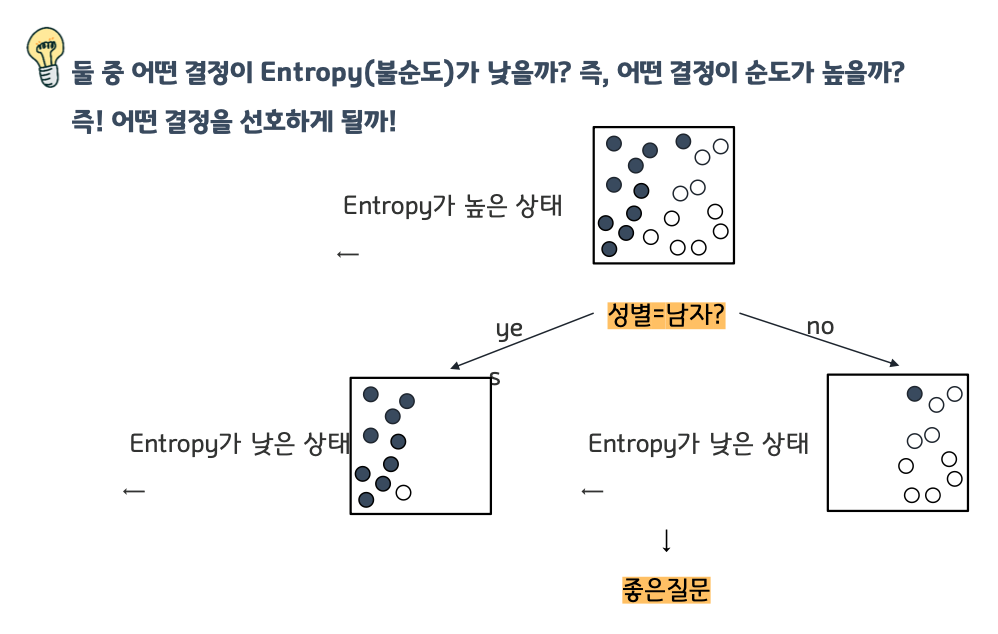

### Pruning (가지치기) : Overfitting의 방지

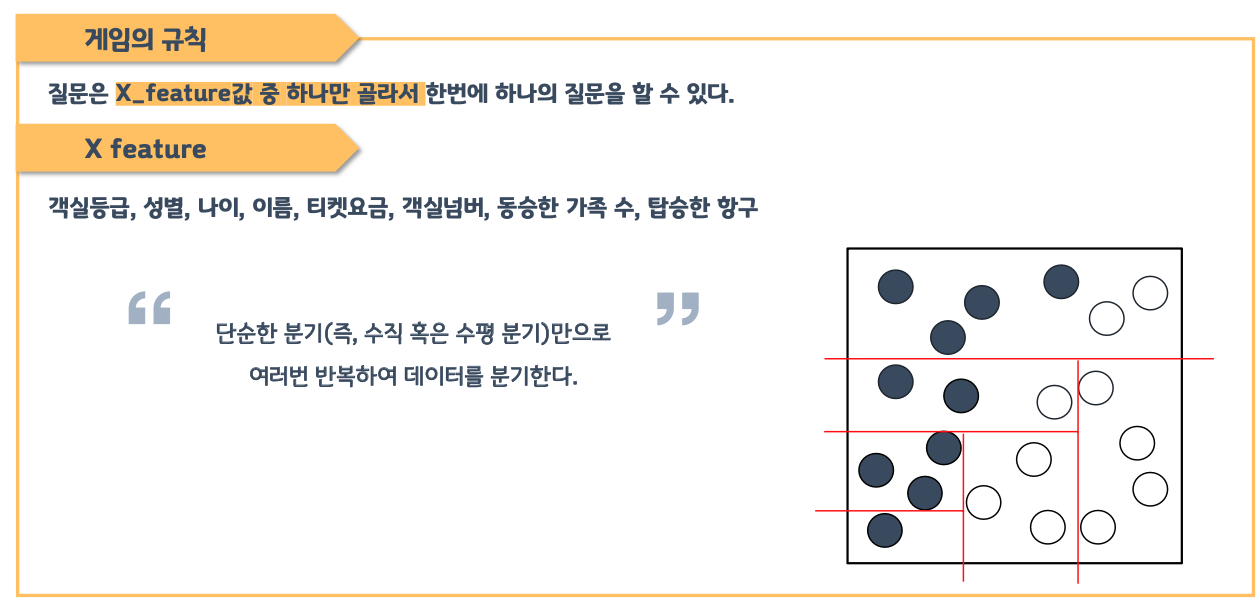

- 타이타닉 탑승객 891명 중 45번째 탑승객은 살았을까? (질문1) 
- 질문1을 결정할 후보가 참 많은데,이중에서 누가 가장 Entropy를 낮추는 질문인지를 하나씩 비교해보면서 Entropy를 가장 많이 낮추는 질문을 찾는다.
    - ex) 성별이 남자? 나이가 30이상? 나이가 40이상? 나이가 50이상? 객실등급이 1등급? 객실등급이 2등급이상? 이름이 mr. kim?

- 이러한 질문들을 결정하는 과정 반복! → 마치 스무고개와 같은 이 과정을 **recursive partitioning**이라 한다. 
    - Decision Tree는 기본적으로 Recursive Partitioning(반복적 분할) 방법론으로 학습을 진행한다. 
    - Recursive Partitioning이란, Entropy를 낮추는 방식으로 Feature를 계속 분할하는 것을 의미한다.

- 문제는 이 과정을 Entropy가 완전히 0이 될 때까지 진행하기 때문에 Trainset에 대하여 과적합 즉, Overfitting이 일어나기 쉽다.

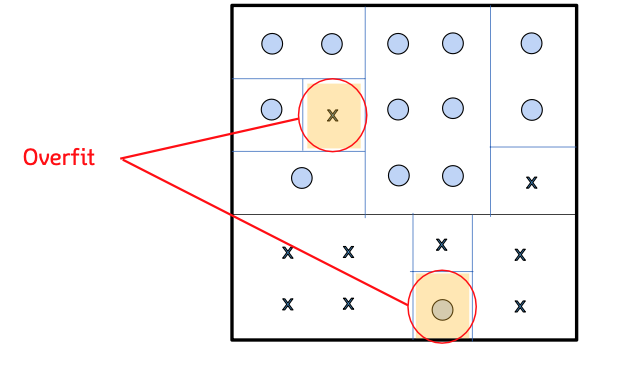

이러한 문제를 해결하기 위해 가지치기(Prunning)을 해준다. 

- 가지치기란? 
    - 너무 아래로 많이 뻗어나가지 않도록 중간에서 끊어주는 것이다.

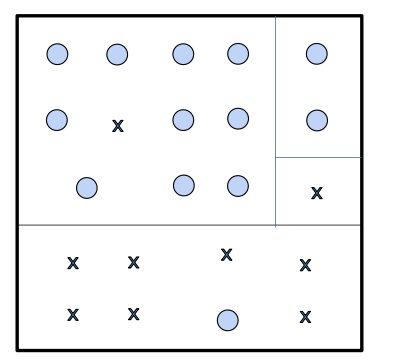

- recursive partitionin의 깊이는 사람이 결정 -> 질문을 여러번 할 수록 모델복잡도는 상승!
- 즉 트리의 깊이는 사람이 조절할 수 있는 하이퍼 파라미터 입니다! 

의사 결정 나무의 특징

- 결과가 직관적이며, 해석하기 쉬움
- 나무 깊이가 깊어질수록 과적합(Overfitting) 문제 발생 가능성이 매우 높음
- 회귀와 분류 모두 사용 가능
    - 회귀는 겹치지 않는 구역으로 데이터를 나눔
    - 특정 구역에 데이터가 있으면, 그 데이터의 예측값은 해당 구역의 평균값임


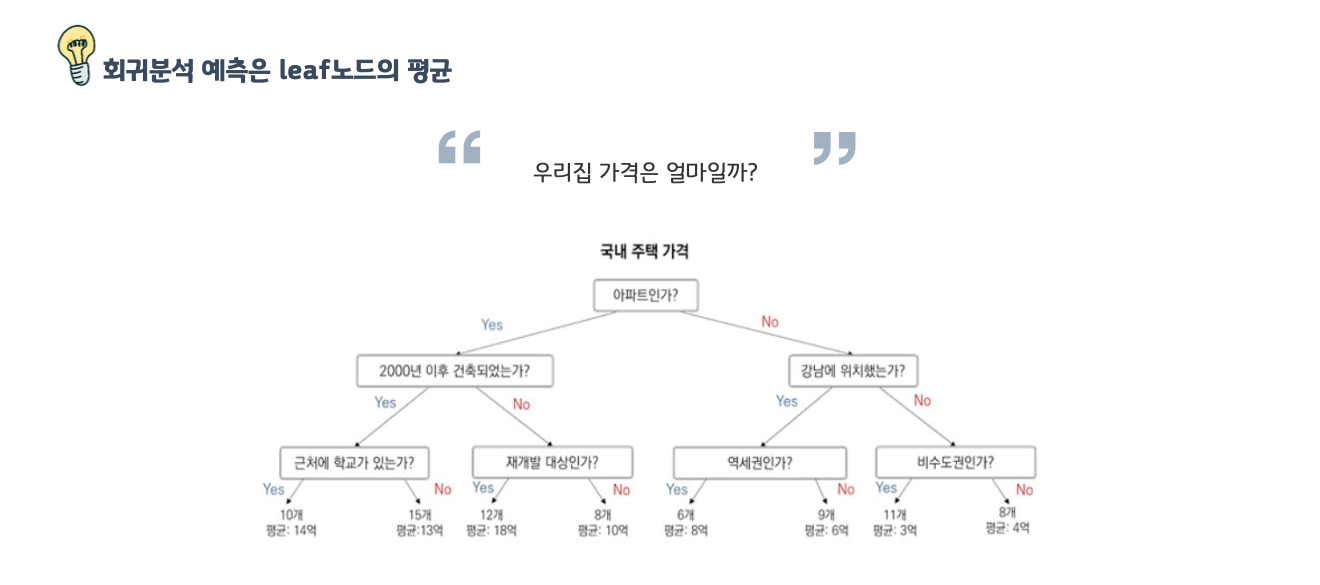

### 실제 데이터에 적용하기

In [3]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()
X = iris_data.data 
y = iris_data.target


# 시각화를 위해서 특성 2개만을 사용하자. 

X_train, X_test, y_train, y_test = train_test_split(iris_data.data[:,:2], iris_data.target,
                                                    stratify = iris_data.target,
                                                    shuffle = True)
X_train.shape, X_test.shape, y_train.shape


((112, 2), (38, 2), (112,))

`DecisionTreeClassifier(ciriterion, min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes)`
* 사이킷런에서 제공하는 트리 기반의 분류 모델
* 노드 : 질문(질문의 층 : 깊이)
* 리프 : 답변 숫자(답변 1개 : 리프 1개)

주요 parameter:
* `criterion`: 정보 균일도 측정 방법(gini/entropy), (기본 값="gini")
* `min_samples_split`: 분할 되기 위해 필요한 최소한의 샘플 데이터 수, (기본 값=2)
* `min_samples_leaf`: 노드가 되기 위해 필요한 최소한의 데이터 수, (기본 값=1)
* `max_features`: 분할 시 고려해야 할 최대 피처 개수, (기본 값=None)
* `max_depth`: 트리의 최대 깊이, (기본 값=None) 
 - max_depth : "제일 많이 사용"
* `max_leaf_nodes`: 말단 노드의 개수, (기본 값=None)

'min_samples_split', 'min_samples_leaf', 'max_depth'는 과적합을 제어하는 데에 사용되는 parameter이다. 

참고: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
# 결정나무 모델을 불러와 학습시키세요
# 조건 : critetion = "entropy", max_depth = 1

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=1, 
                                  random_state=0).fit(X_train, y_train)

In [5]:
# 학습데이터 스코어와 테스트 데이터 스코어를 확인하세요 

print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 0.652
test socre : 0.605


트리를 시각화해봅시다ㅏ. 

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree.dot', class_names = iris_data.target_names,
                feature_names = iris_data.feature_names[:2], filled = True)

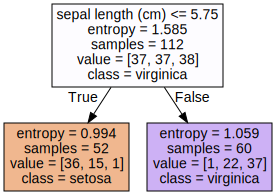

In [7]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

- samples : 각 노드에 적힌 samples는 각 노드에 있는 샘플의 수
- value는 클래스당 샘플의 수

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def model_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()] #배열붙이기
    #np.ravel(x, order='C') : C와 같은 순서로 인덱싱하여 평평하게 배열 (디폴트)
    Z = model.predict(X_pred).reshape(X1.shape) 
    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5)
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5)
    plt.xlim([4.4, 7.6])
    plt.ylim([2, 4.0])
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$") 

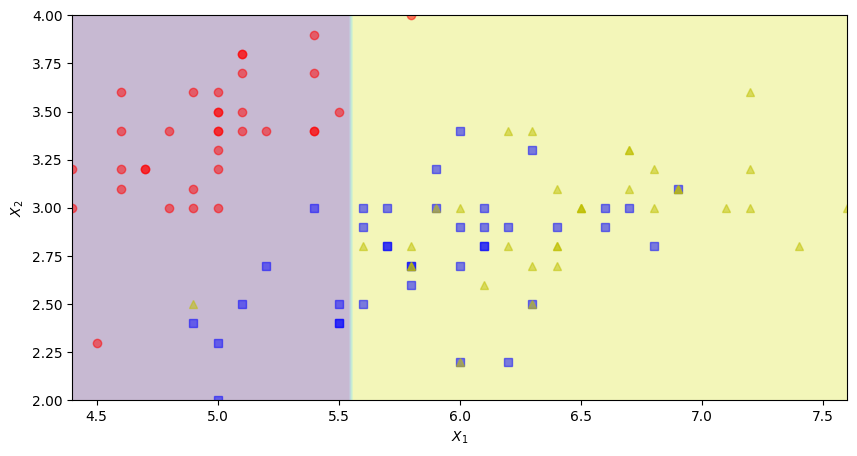

In [ ]:
model_border(model_dt, X_train, y_train)

결정트리의 경계가 제대로 형성되지 않았다.

#### MaxDepth 6


In [ ]:
X_train.shape, y_train.shape, X_test.shape

((112, 2), (112,), (38, 2))

In [ ]:
# 결정나무 모델을 불러와 학습시키세요
# 조건 : critetion = "entropy", max_depth = 6

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth = 6, random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree2.dot', class_names = iris_data.target_names, 
                feature_names = iris_data.feature_names[:2], filled = True)

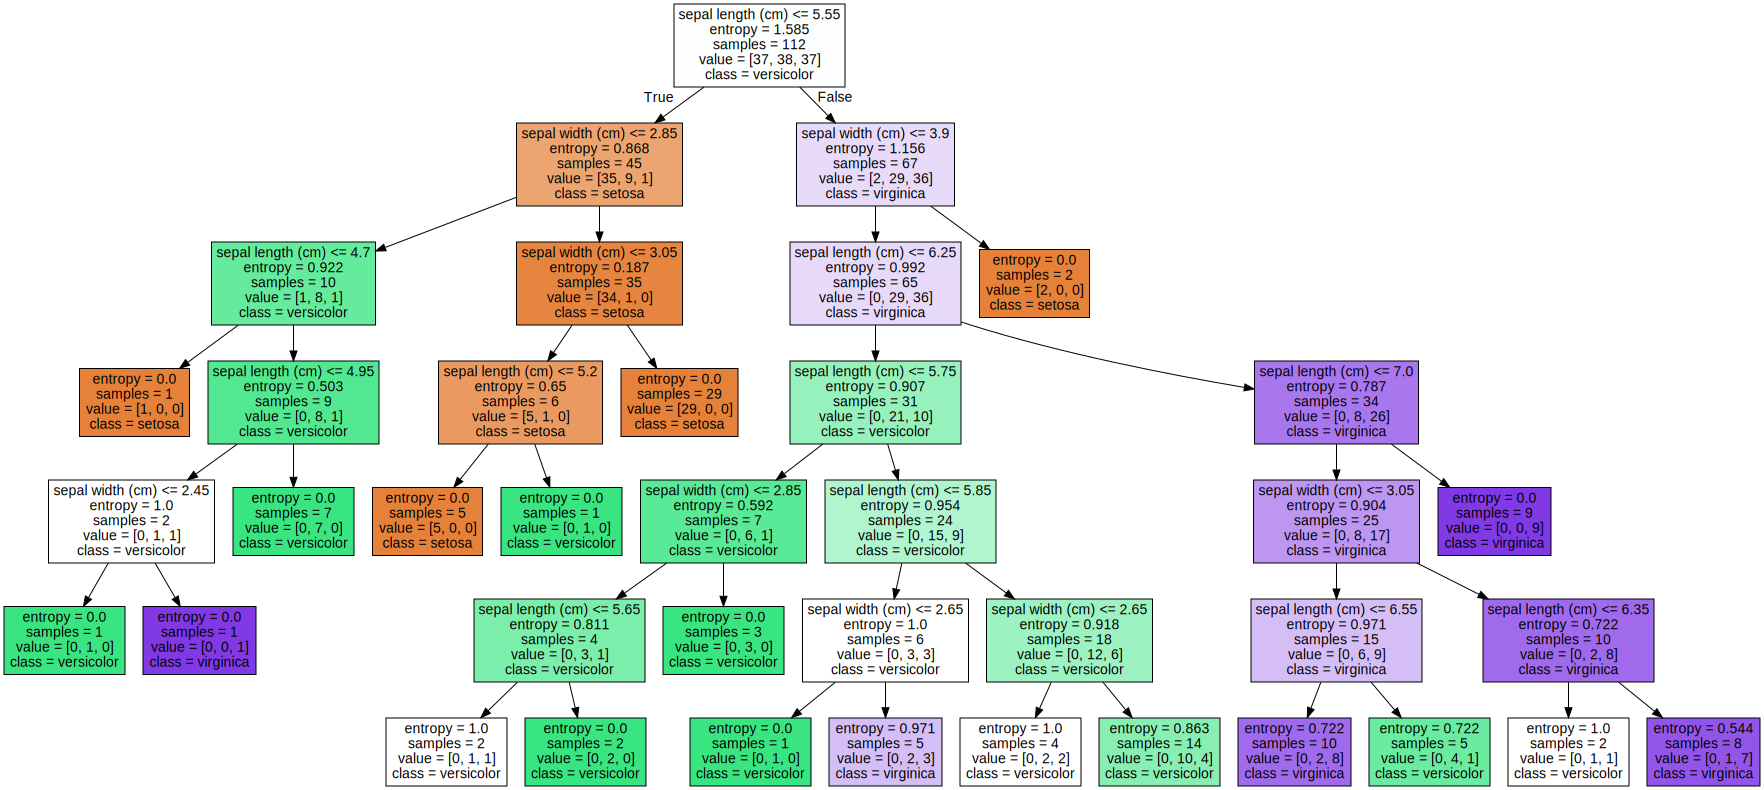

In [ ]:
import graphviz

with open('tree2.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 0.875
test socre : 0.684


max_depth를 6로 설정한 결과이다. 이전의 모델보다 깊게 설정한 결과 과적합이 발생했다.

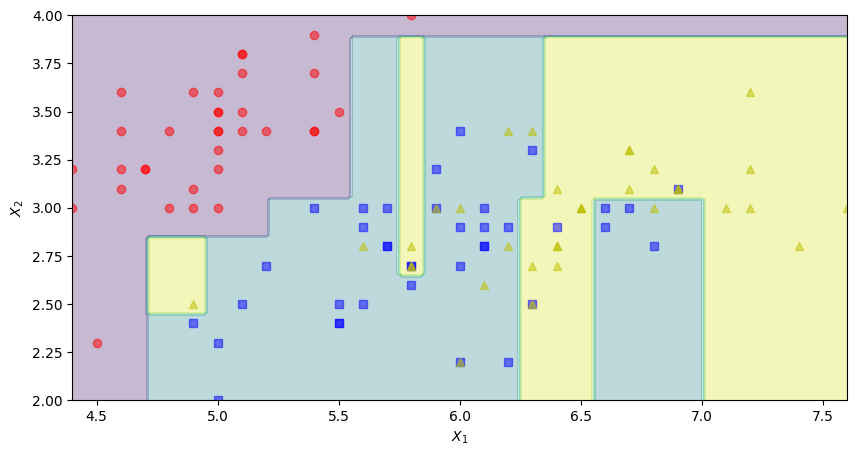

In [ ]:
model_border(model_dt, X_train, y_train)

위에서는 시각화를 위해 2가지 특성만 사용했습니다. 이제 전체 특성을 모두 사용해봅시다. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target)

model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6, random_state = 0).fit(X_train, y_train)

In [ ]:
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 1.000
test socre : 0.947


In [ ]:
model_dt.feature_importances_ # 이 모델이 어떤 특성을 제일 중요하게/ 많이 썼는지 알려줌

array([0.0420611 , 0.02206974, 0.0793407 , 0.85652847])

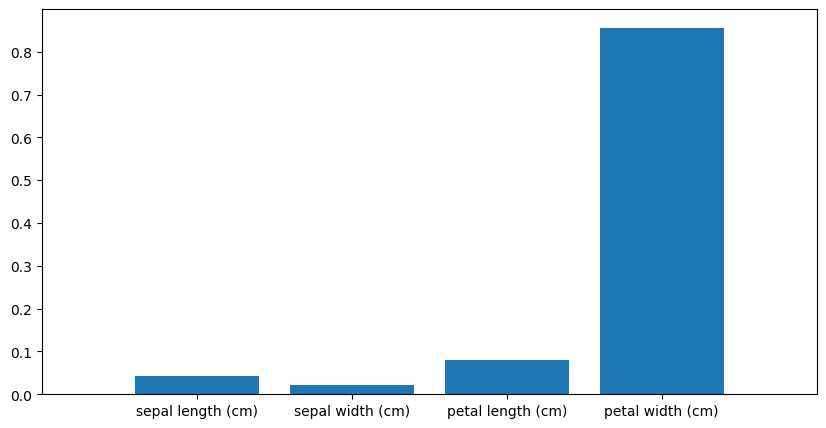

In [ ]:
# 특성 중요도 그래프 그리기
plt.figure(figsize =(10,5))
plt.bar(np.arange(iris_data.data.shape[1]),model_dt.feature_importances_)

plt.xticks(np.arange(iris_data.data.shape[1]), iris_data.feature_names)
plt.xlim(-1, iris_data.data.shape[1])
plt.show()

- sepal length 특성은 트리모델에서 전혀 사용되지 않았으며, 가장 중요한 특성은 petal width

#### GridSearchCV

- 그렇다면 최적의 모델은 어떻게 찾을 수 있을까? 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Decision Tree 객체 생성
DTC = DecisionTreeClassifier(random_state=41, )

# param_grid 설정
dtc_param_grid = {
            "criterion" : ["gini", "entropy"],
            "max_depth" :   [2, 3, 4, 5,  6, 7, 8],
            "min_samples_leaf" : [1, 3, 5, 7]
            }

# Grad Search 객체 생성
gsDTC = GridSearchCV(DTC,
                     param_grid = dtc_param_grid, 
                     cv=4, 
                     scoring="accuracy", 
                     n_jobs= 4, 
                     verbose = 1)

# Grid Search 실행
gsDTC.fit(X_train,y_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=41), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 3, 5, 7]},
             scoring='accuracy', verbose=1)

In [ ]:
# 최적의 파라미터 조합 출력
DTC_best = gsDTC.best_estimator_
print(DTC_best)

# 최고 점수(accuracy) 출력
print(gsDTC.best_score_)


DecisionTreeClassifier(max_depth=2, random_state=41)
0.9464285714285714


In [ ]:
DTC_best.feature_importances_

array([0.        , 0.        , 0.55959964, 0.44040036])

In [ ]:
print('train score : {:.3f}'.format(DTC_best.score(X_train, y_train)))
print('test socre : {:.3f}'.format(DTC_best.score(X_test, y_test)))

train score : 0.955
test socre : 0.974


## 모델링 실습

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
# EDA

In [ ]:
# 전처리

In [ ]:
# 모델링

In [ ]:
# 성능평가